In [1]:
# Import necessary libraries and modules
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import tadasets
from sklearn.metrics import pairwise_distances

In [2]:
# Function to create a Vietoris-Rips complex given a distance matrix and radius
def create_simplicial_complex(D, r):
    """
    Input: distance matrix and not negative radius
    Output: networkx graph
    """

    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r)
    G.add_edges_from(edge_list)

    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))

    return G

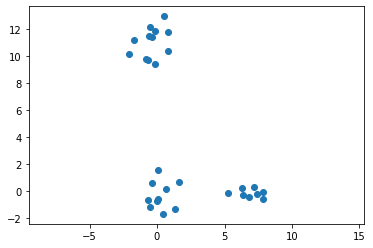

In [3]:
# Generate three sets of 2D points with different means and covariances
X1 = np.random.multivariate_normal([0, 0], np.array([[1, 0], [0, 1]]), size=10)
X2 = np.random.multivariate_normal([7, 0], np.array([[1, 0], [0, 0.2]]), size=8)
X3 = np.random.multivariate_normal([0, 11], np.array([[1, 0], [0, 1]]), size=12)

# Combine the three sets of points into one array
X = np.concatenate((X1, X2, X3))

# Plot the combined points
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal')
plt.show()

In [4]:
X

array([[ 0.45948243, -1.67300564],
       [ 0.67766865,  0.14667763],
       [ 0.01581287, -0.69717203],
       [ 1.61822551,  0.70851274],
       [-0.37057809,  0.59044523],
       [-0.70715879, -0.60948585],
       [ 0.07413632, -0.59480212],
       [ 1.31617194, -1.27178123],
       [-0.49908346, -1.13270823],
       [ 0.09678197,  1.55513975],
       [ 6.31389101,  0.26306436],
       [ 7.20622913,  0.31070285],
       [ 7.84013723, -0.53574304],
       [ 6.82259993, -0.41211025],
       [ 7.41459736, -0.19512609],
       [ 5.26675591, -0.1002462 ],
       [ 6.34925828, -0.27014935],
       [ 7.87886492, -0.07098393],
       [-0.49189523, 12.17333623],
       [ 0.80463024, 10.42766776],
       [-0.79104664,  9.8103633 ],
       [ 0.77633231, 11.78620755],
       [-0.68475404,  9.76900082],
       [ 0.47984444, 12.97683557],
       [-2.05395996, 10.16180378],
       [-0.34444209, 11.4035471 ],
       [-1.74321155, 11.23522993],
       [-0.12121213, 11.88360376],
       [-0.61124707,

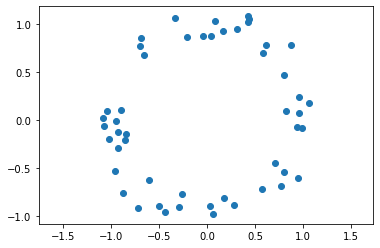

In [5]:
# Set random seed for reproducibility
np.random.seed(9)

# Generate points from a noisy d-sphere using Tadasets library
x = tadasets.dsphere(n=50, d=1, noise=0.1)
y = np.array([[1, 0], [0, 1], [2, 2]])

# Plot the points from the d-sphere
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.show()

In [6]:
nuevox = pd.DataFrame(x)
nuevoy = pd.DataFrame(y)

In [7]:
nuevox

,0,1
0,0.059956,-0.976020
1,-0.951943,-0.005367
2,-0.725203,-0.913380
3,-0.859442,-0.202312
4,-0.294176,-0.906512
5,0.440317,1.054724
6,0.428973,1.022121
7,1.061546,0.176966
8,0.944998,-0.606192
9,-0.330916,1.062458


In [8]:
nuevoy

,0,1
0,1,0
1,0,1
2,2,2


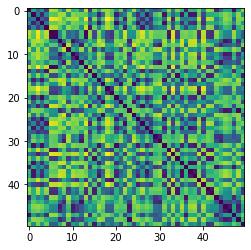

In [9]:
# Convert x and y (another dataset) to pandas dataframes
nuevox = pd.DataFrame(x)
nuevoy = pd.DataFrame(y)

# Calculate pairwise distance matrices for x and y
dist = pairwise_distances(x)
plt.imshow(dist)
plt.show()

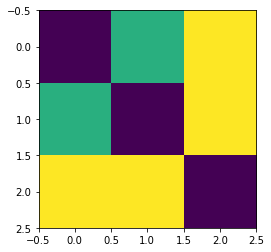

In [10]:
y = pairwise_distances(y)
plt.imshow(y)
plt.show()

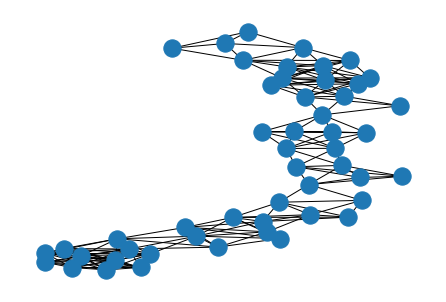

In [11]:
# Create and plot Vietoris-Rips complex for radius 0.5
r = 0.5
G = create_simplicial_complex(dist, r)
nx.draw_kamada_kawai(G)

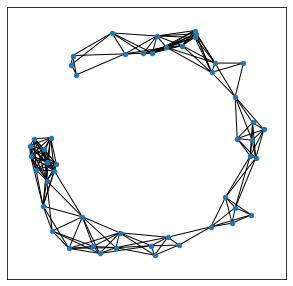

In [12]:
posi = {n: x[n, :] for n in range(len(x))}
plt.figure(figsize=(5, 5))

nx.draw_networkx(G, pos=posi, with_labels=False, node_size=20)
plt.axis('equal')
plt.show()

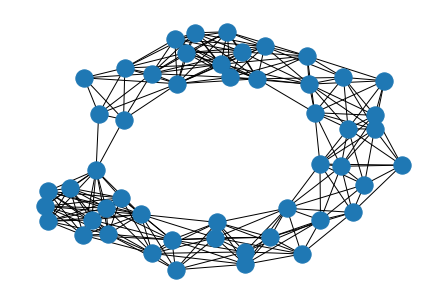

In [13]:
# Create and plot Vietoris-Rips complex for radius 0.7
r = 0.7
G = create_simplicial_complex(dist, r)
nx.draw_kamada_kawai(G)

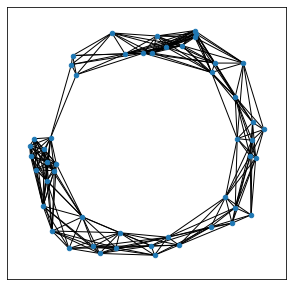

In [14]:
posi = {n: x[n, :] for n in range(len(x))}
plt.figure(figsize=(5, 5))

nx.draw_networkx(G, pos=posi, with_labels=False, node_size=20)
plt.axis('equal')
plt.show()

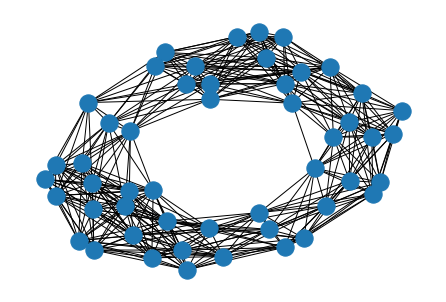

In [15]:
# Create and plot Vietoris-Rips complex for radius 1
r = 1
G = create_simplicial_complex(dist, r)
nx.draw_kamada_kawai(G)

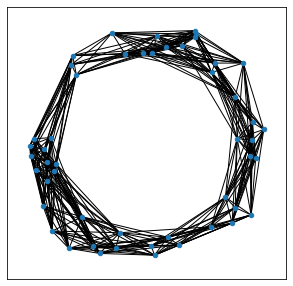

In [16]:
posi = {n: x[n, :] for n in range(len(x))}
plt.figure(figsize=(5, 5))

nx.draw_networkx(G, pos=posi, with_labels=False, node_size=20)
plt.axis('equal')
plt.show()